In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sn.set(color_codes=True)

song_tf = pd.read_csv("D:/ONE Drive/Durham College/Dakshvir singh Rehill - AI Song Mixer/Spotify Dataset/SongTimeFrameData.csv")
song_sec = pd.read_csv("D:/ONE Drive/Durham College/Dakshvir singh Rehill - AI Song Mixer/Spotify Dataset/SongSectionData.csv", encoding= 'unicode_escape')

song_tf.head()



,song_id,start,duration,confidence,type
0,3GYlQmwfBDo7imFyGPhrl7,0.21805,2.03269,0.434,Bar
1,3GYlQmwfBDo7imFyGPhrl7,2.25075,2.03112,0.629,Bar
2,3GYlQmwfBDo7imFyGPhrl7,4.28186,2.03905,0.475,Bar
3,3GYlQmwfBDo7imFyGPhrl7,6.32091,2.03808,0.499,Bar
4,3GYlQmwfBDo7imFyGPhrl7,8.35899,2.02981,0.858,Bar


In [2]:
song_sec.head()


,song_id,start,duration,confidence,loudness,tempo,tempo_confidence,key,key_confidence,mode,mode_confidence,time_signature,time_signature_confidence
0,3GYlQmwfBDo7imFyGPhrl7,0.00000,7.84868,1.000,-9.188,118.144,0.690,10,0.460,0,0.521,4,1.0
1,3GYlQmwfBDo7imFyGPhrl7,7.84868,20.33787,0.995,-5.653,118.066,0.602,6,0.314,1,0.357,4,1.0
2,3GYlQmwfBDo7imFyGPhrl7,28.18655,32.04597,0.249,-5.758,118.089,0.520,8,0.586,1,0.441,4,1.0
3,3GYlQmwfBDo7imFyGPhrl7,60.23252,13.71780,0.575,-4.426,118.093,0.413,10,0.769,0,0.758,4,1.0
4,3GYlQmwfBDo7imFyGPhrl7,73.95033,15.25288,0.466,-5.423,117.995,0.468,1,0.533,1,0.632,4,1.0


In [3]:
song_sec.corr()


#modecon * key confidence
# 

,start,duration,confidence,loudness,tempo,tempo_confidence,key,key_confidence,mode,mode_confidence,time_signature,time_signature_confidence
start,1.000000,0.040098,-0.106513,-0.173218,-0.039121,-0.008778,-0.028276,-0.095944,0.044177,-0.109230,-0.019649,-0.010539
duration,0.040098,1.000000,-0.047879,0.203920,0.035578,0.117042,0.061313,0.185816,-0.067008,0.153249,0.030465,-0.034275
confidence,-0.106513,-0.047879,1.000000,-0.260058,0.097699,0.024350,-0.031458,-0.083051,0.027667,-0.086641,0.001539,0.013528
loudness,-0.173218,0.203920,-0.260058,1.000000,0.287506,0.141219,0.080430,0.151407,-0.080827,0.171452,0.091590,0.094650
tempo,-0.039121,0.035578,0.097699,0.287506,1.000000,0.042045,0.038941,0.045657,-0.028118,0.059088,0.026907,0.038212
tempo_confidence,-0.008778,0.117042,0.024350,0.141219,0.042045,1.000000,0.022606,-0.120486,0.044414,-0.111052,0.077359,0.158973
key,-0.028276,0.061313,-0.031458,0.080430,0.038941,0.022606,1.000000,0.088367,-0.261527,0.171146,0.010179,-0.002438
key_confidence,-0.095944,0.185816,-0.083051,0.151407,0.045657,-0.120486,0.088367,1.000000,-0.109690,0.771758,0.006889,-0.037799
mode,0.044177,-0.067008,0.027667,-0.080827,-0.028118,0.044414,-0.261527,-0.109690,1.000000,-0.108866,-0.007161,0.004658
mode_confidence,-0.109230,0.153249,-0.086641,0.171452,0.059088,-0.111052,0.171146,0.771758,-0.108866,1.000000,0.003600,-0.036764


In [14]:
song_tf.corr()


,start,duration,confidence
start,1.000000,-0.001023,0.059296
duration,-0.001023,1.000000,0.003081
confidence,0.059296,0.003081,1.000000


In [15]:

song_tf.describe()


,start,duration,confidence
count,2.385763e+07,2.385763e+07,2.385763e+07
mean,1.484509e+02,4.359264e-01,5.091204e-01
std,1.190608e+02,4.413187e-01,2.496018e-01
min,8.880000e-03,6.036000e-02,0.000000e+00
25%,6.293256e+01,2.341500e-01,3.090000e-01
50%,1.268398e+02,2.473100e-01,4.960000e-01
75%,2.014741e+02,4.688800e-01,7.090000e-01
max,2.226266e+03,8.970700e+00,1.000000e+00


In [4]:
song_sec.isnull().sum()

song_id                      0
start                        0
duration                     0
confidence                   0
loudness                     0
tempo                        0
tempo_confidence             0
key                          0
key_confidence               0
mode                         0
mode_confidence              0
time_signature               0
time_signature_confidence    0
dtype: int64

In [5]:
song_tf.isnull().sum()

song_id       0
start         0
duration      0
confidence    0
type          0
dtype: int64

In [6]:
song_sec.nunique()

song_id                       13948
start                        117803
duration                     126878
confidence                     1001
loudness                      26209
tempo                         43610
tempo_confidence                999
key                              13
key_confidence                 1001
mode                              3
mode_confidence                 994
time_signature                    5
time_signature_confidence       888
dtype: int64

In [7]:
song_sec["mode"].unique()

array([ 0,  1, -1], dtype=int64)

In [8]:
song_sec["time_signature"].unique()

array([4, 1, 5, 3, 0], dtype=int64)

In [9]:
song_sec["key"].unique()

array([10,  6,  8,  1,  5, 11,  3,  0,  7,  2,  4,  9, -1], dtype=int64)

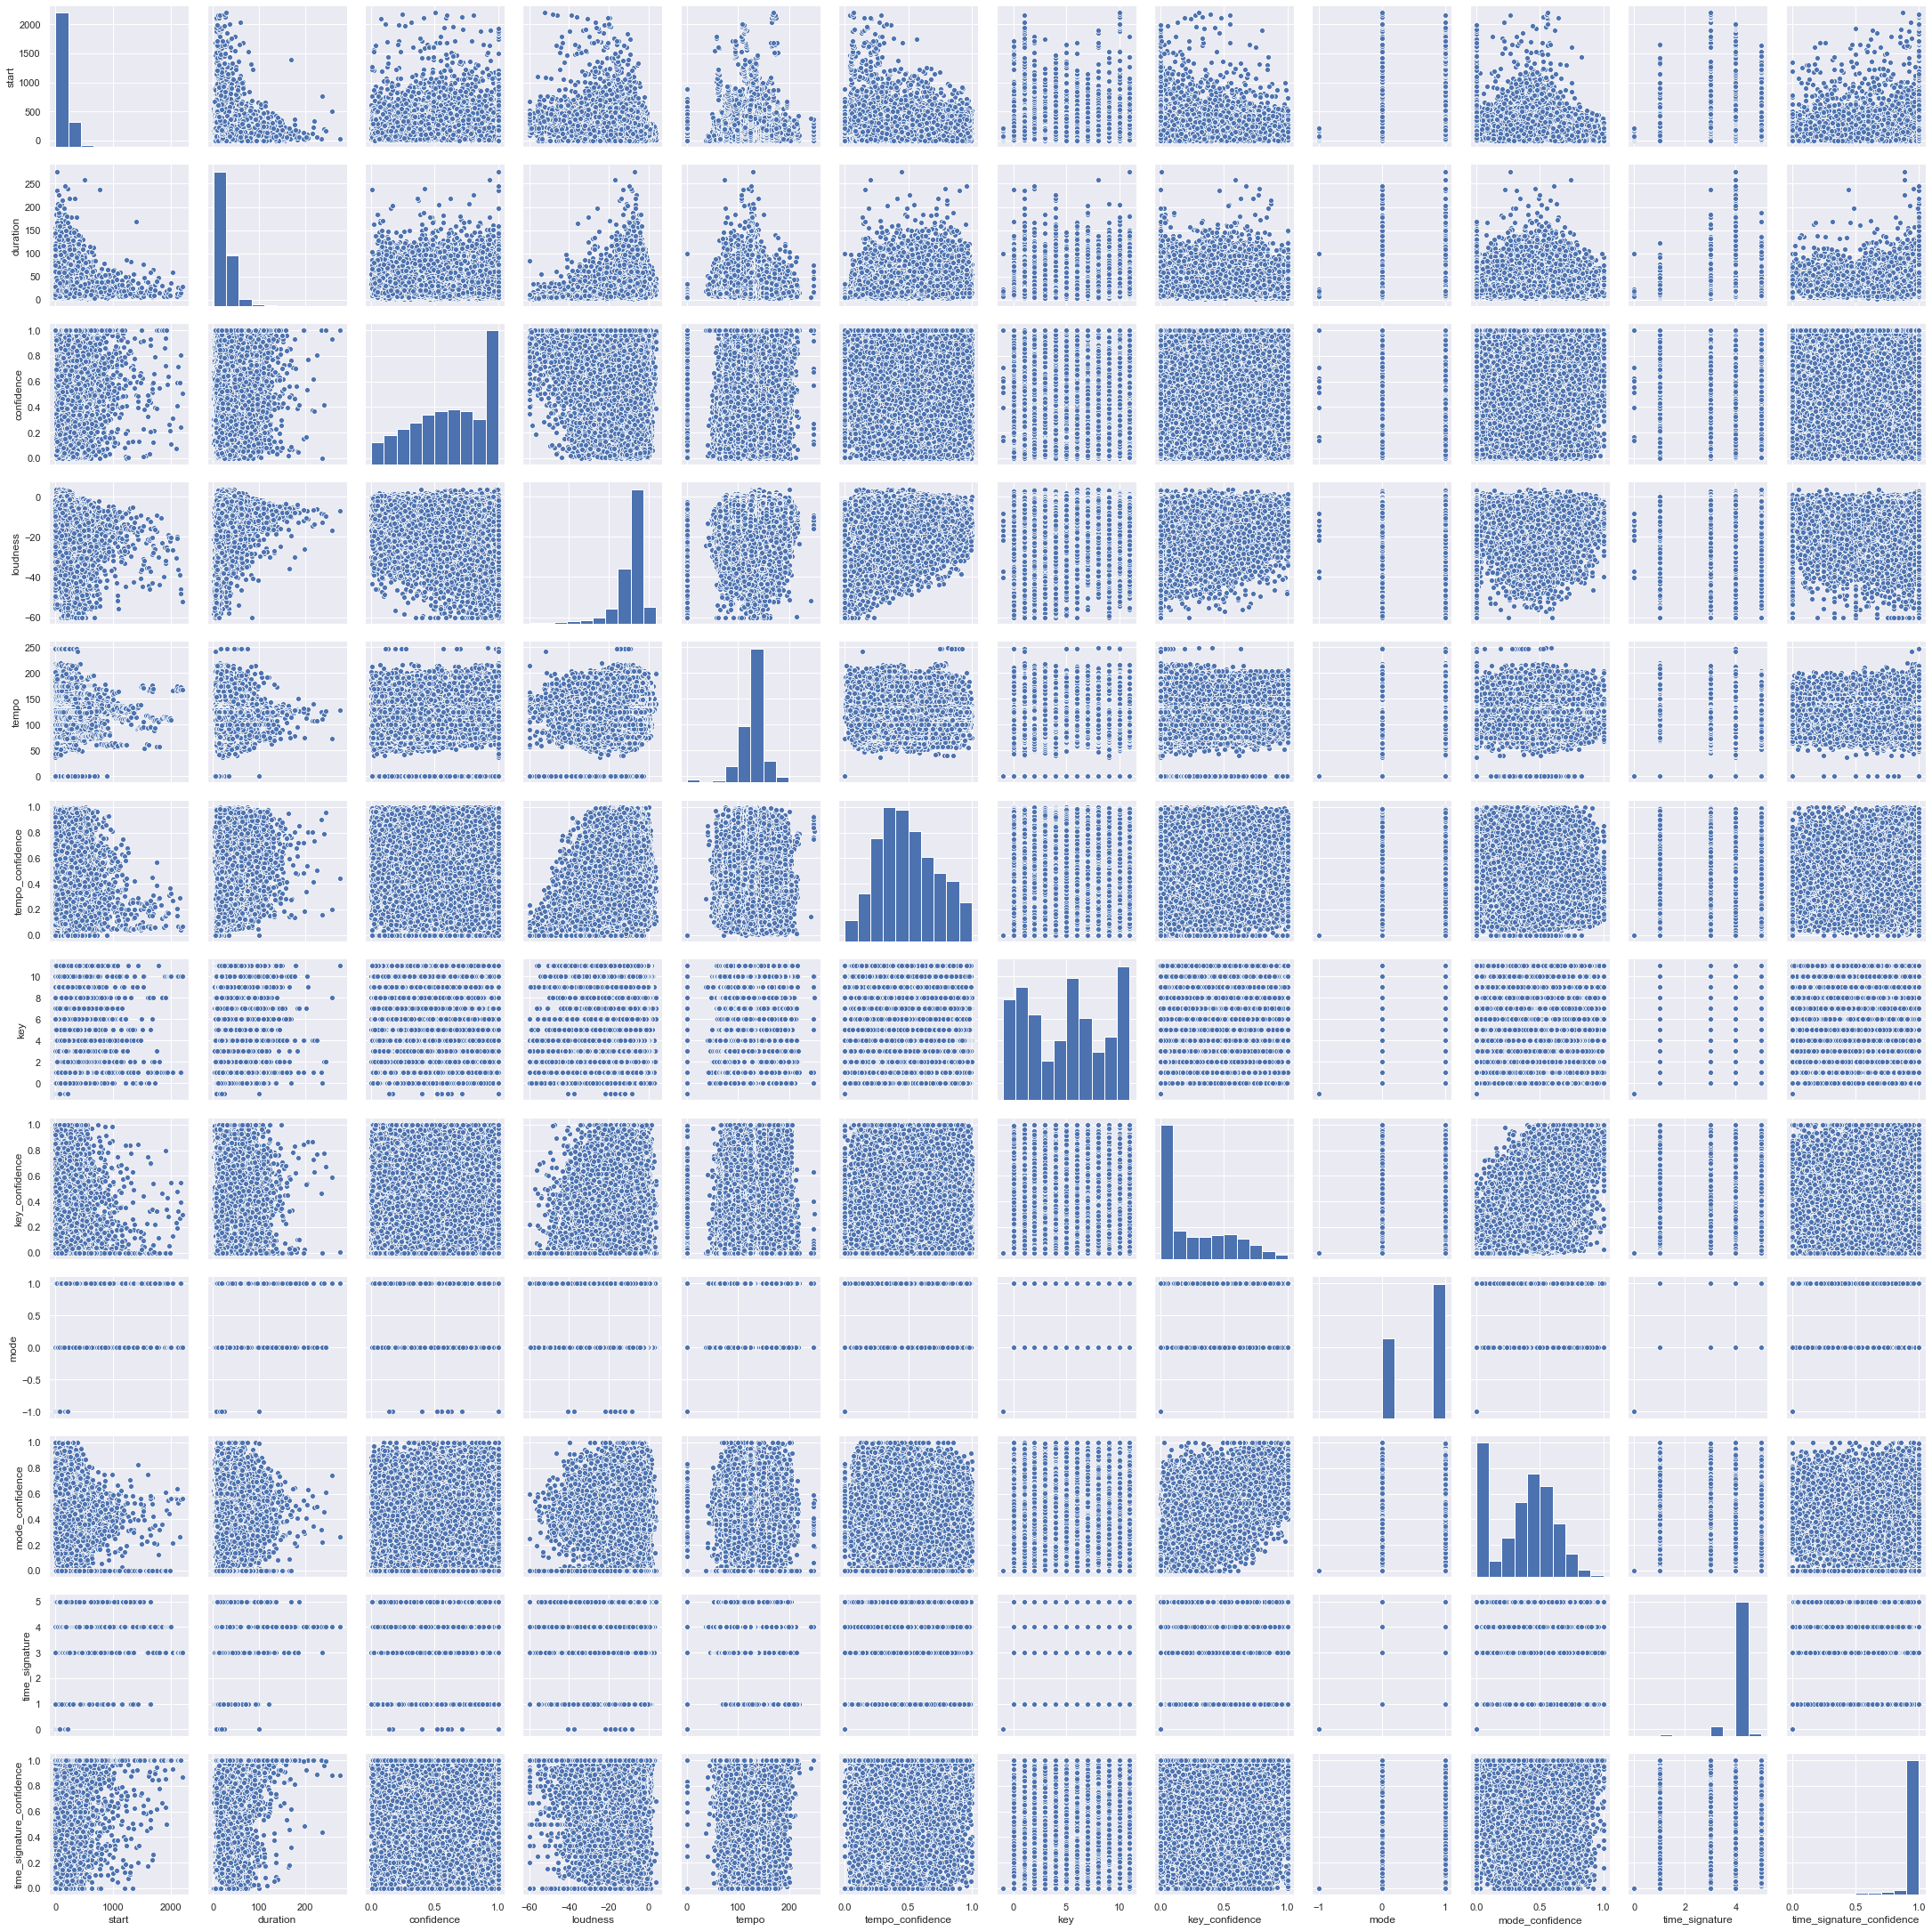

In [10]:
#modecon * key confidence

fig= plt.figure

#ax= fig.add_subplot(1,1,1)

sn.pairplot(song_sec)


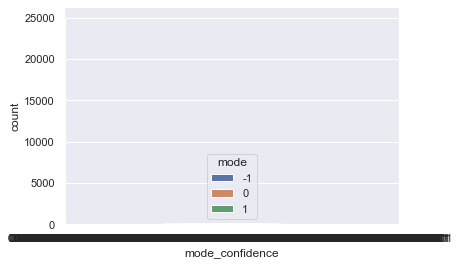

In [11]:
#sn.barplot(x='key_confidence', y='mode_confidence' , data=song_sec, hue='mode')

sn.countplot(x='mode_confidence', hue='mode', data=song_sec)


In [12]:
#sn.barplot(x='key_confidence', y='mode_confidence' , data=song_sec, hue='mode')

#sn.catplot(x='mode_confidence', y='key_confidence', col='mode',hue='key', data=song_sec)




In [13]:
# TF

song_tf.corr()

,start,duration,confidence
start,1.000000,-0.001023,0.059296
duration,-0.001023,1.000000,0.003081
confidence,0.059296,0.003081,1.000000


In [ ]:
sn.boxplot(x='duration', y='start', data=song_tf, palette='rainbow')


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C6E46F8DC0> (for post_execute):


KeyboardInterrupt: 